In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
iris = load_iris()
x = iris.data
y = iris.target

In [6]:
# Normalize the data using Standardization
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
y_kmeans = kmeans.fit_predict(x_normalized)

# Evaluate KMeans clustering using accuracy score (Note: KMeans is unsupervised)
kmeans_score = accuracy_score(y, y_kmeans)
print("Accuracy Score - KMeans:", kmeans_score * 100)

Accuracy Score - KMeans: 24.0


In [7]:
# Normalize the data using Standardization
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=1)
y_dbscan = dbscan.fit_predict(x_normalized)

#dbscan_score = accuracy_score(y, y_dbscan)

#print("Accuracy Score - DBSCAN:", dbscan_score*100)


In [8]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(x)
hc_score = accuracy_score(y, y_hc)
print("Accuracy Score - Hierarchical Clustering:", hc_score*100)

Accuracy Score - Hierarchical Clustering: 23.333333333333332


Text(0.5, 1.0, 'Hierarchical Clustering')

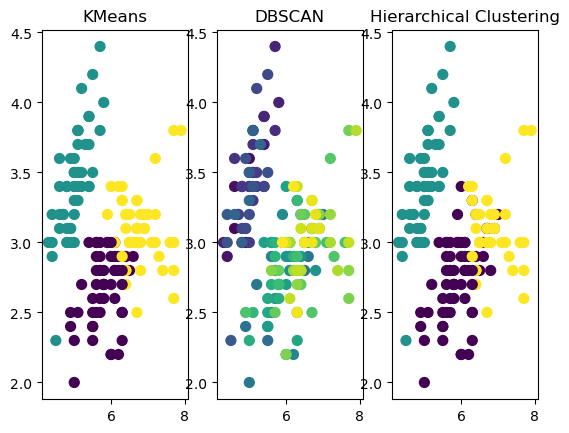

In [9]:
plt.subplot(131)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title("KMeans")
plt.subplot(132)
plt.scatter(x[:, 0], x[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title("DBSCAN")
plt.subplot(133)
plt.scatter(x[:, 0], x[:, 1], c=y_hc, s=50, cmap='viridis')
plt.title("Hierarchical Clustering")

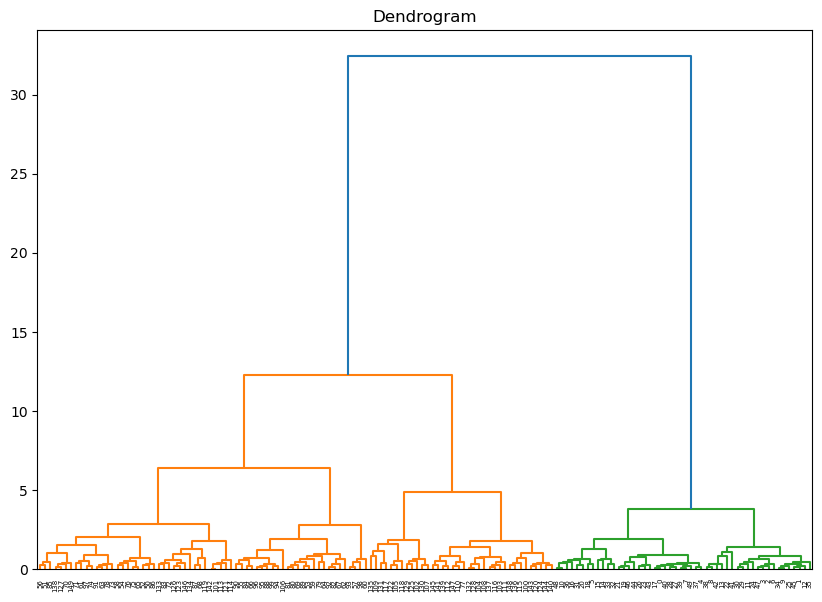

In [10]:
linked = linkage(x, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram")
plt.show()